## 1) Problem statement.

* This dataset will be used to complement the Airplane Crashes Since 1908. The data ranges from 1985 to 2014. It contains data about accidents and fatalities by airline just like the first dataset, but it also contains data about ASKS (available seat kilometers) which will help us normalize the number of accidents to the number of seats and kilometers traveled every week by each airline.

## 2) Data Collection.
- The Dataset is collected from  https://www.kaggle.com/saurograndi/airplane-crashes-since-1908
- The data consists of 13 column and 5268 rows.

### 2.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
air_crashes = pd.read_csv('data/Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [3]:
air_crashes.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [4]:
air_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [5]:
airlines = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv")
airlines.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [6]:
null_df = pd.DataFrame({'Null Values' : air_crashes.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (air_crashes.isna().sum().sort_values(ascending=False)) / (air_crashes.shape[0]) * (100)})
null_df

,Null Values,Percentage Null Values
Flight #,4199,79.707669
Time,2219,42.122248
Route,1706,32.384207
cn/In,1228,23.310554
Summary,390,7.403189
Registration,335,6.359150
Type,27,0.512528
Aboard,22,0.417616
Ground,22,0.417616
Location,20,0.379651


In [7]:
df_copy = air_crashes.copy()

In [8]:
df_copy.drop(columns=["Time",'Flight #','Route','cn/In','Registration','Ground'], inplace=True)

In [9]:
df_copy.head(2)

,Date,Location,Operator,Type,Aboard,Fatalities,Summary
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,First U.S. dirigible Akron exploded just offsh...


In [10]:
null_df = pd.DataFrame({'Null Values' : df_copy.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df_copy.isna().sum().sort_values(ascending=False)) / (air_crashes.shape[0]) * (100)})
null_df

,Null Values,Percentage Null Values
Summary,390,7.403189
Type,27,0.512528
Aboard,22,0.417616
Location,20,0.379651
Operator,18,0.341686
Fatalities,12,0.227790
Date,0,0.000000


In [11]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Aboard', 'Fatalities']

We have 5 categorical features : ['Date', 'Location', 'Operator', 'Type', 'Summary']


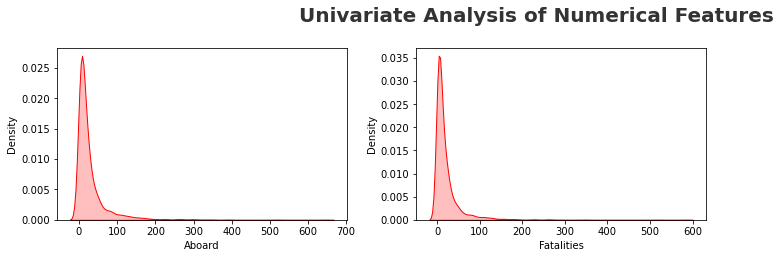

In [12]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### As multiple ouliers are there in 'Aboard' & 'Fatalities'
- Thus we can impute it with median

In [13]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


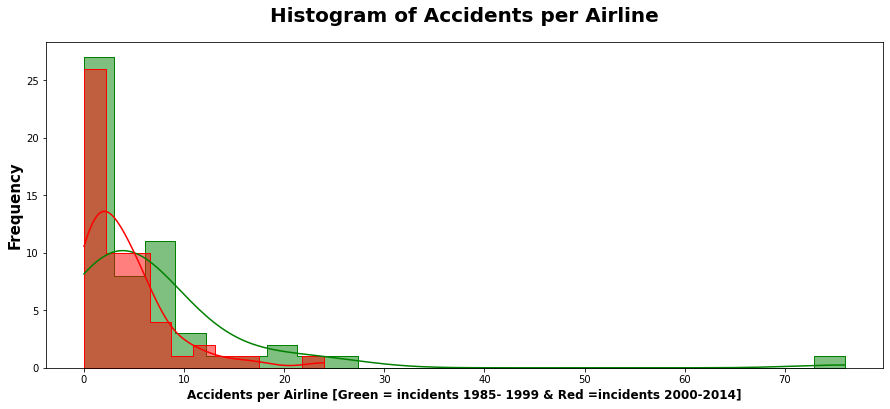

In [14]:
plt.figure(figsize=(15,6))
sns.histplot(data=airlines, x=airlines['incidents_85_99'], kde=True, element="step",color='green')
sns.histplot(data=airlines, x=airlines['incidents_00_14'], kde=True, element="step",color="red")
plt.title("Histogram of Accidents per Airline", weight="bold",fontsize=20, pad=20)
plt.ylabel("Frequency", weight="bold", fontsize=15)
plt.xlabel("Accidents per Airline [Green = incidents 1985- 1999 & Red =incidents 2000-2014]", weight="bold", fontsize=12)
plt.show()

#### Insights
- We can see that the average number of accidents is greater in  first group ie.1985-1999 
- It is obvious that the data is not distributed normally.

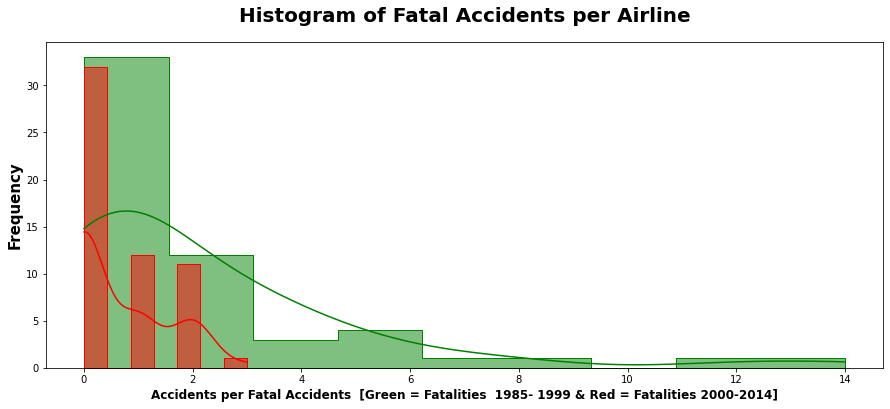

fatal_accidents_85_99 Mean 2.1785714285714284
fatal_accidents_00_14 Mean 0.6607142857142857


In [15]:
plt.figure(figsize=(15,6))
sns.histplot(data=airlines, x=airlines['fatal_accidents_85_99'], kde=True, element="step",color='green')
sns.histplot(data=airlines, x=airlines['fatal_accidents_00_14'], kde=True, element="step",color="red")
plt.title("Histogram of Fatal Accidents per Airline", weight="bold",fontsize=20, pad=20)
plt.ylabel("Frequency", weight="bold", fontsize=15)
plt.xlabel("Accidents per Fatal Accidents  [Green = Fatalities  1985- 1999 & Red = Fatalities 2000-2014]", weight="bold", fontsize=12)
plt.show()
print("fatal_accidents_85_99 Mean" ,airlines.fatal_accidents_85_99.mean())
print("fatal_accidents_00_14 Mean", airlines.fatal_accidents_00_14.mean())

#### Insights
- Large number of fatal accidents occured in 1st group ie.1985-1999
- The data for both groups seems to be right-skewed and non-normally distributed.
- Mean of fatal accidents has reduced from 2.17 to 0.66
- Second group ie. 2000-2014 are safer than first group ie.1985-1999

#### Which airlines are more prone to fatal accidents ?

In [16]:
airlines["total_fatal_accidents"] = airlines["fatal_accidents_85_99"] + airlines["fatal_accidents_00_14"]

In [17]:
airlines["norm_total_fatal_accidents"] = airlines["total_fatal_accidents"] / airlines["avail_seat_km_per_week"] * 1000000

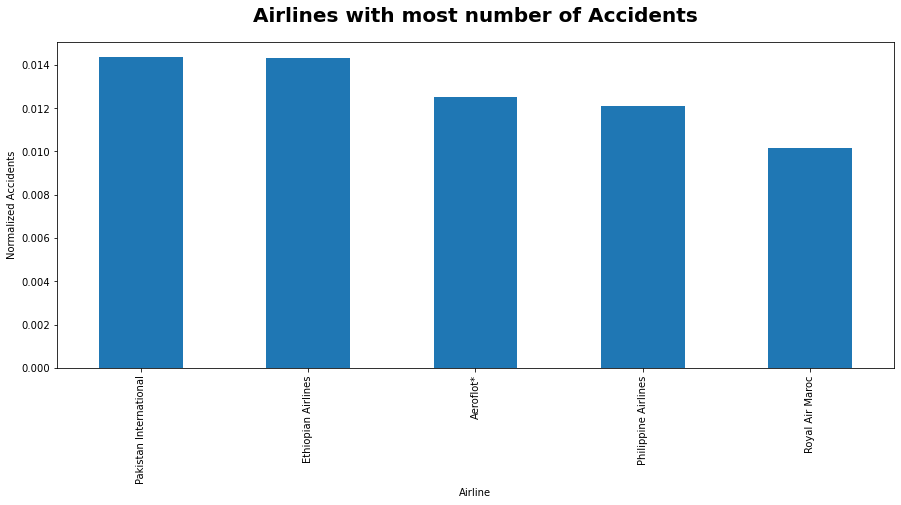

In [23]:
#Normalized Accidents
plt.figure(figsize=(15,6))
data = airlines[["airline","norm_total_fatal_accidents"]]
data = data.sort_values(by="norm_total_fatal_accidents", ascending=False).head()
data.set_index("airline", inplace=True)
data.norm_total_fatal_accidents.plot(kind="bar")
plt.title("Airlines with most number of Accidents", weight="bold",fontsize=20, pad=20)
plt.xlabel("Airline")
plt.ylabel("Normalized Accidents")
plt.show()

#### Insights
- 'Pakistan International' and 'Ethiopian Airlines' are equally dangerous airlines.

In [30]:
train = air_crashes.copy()
train['Time'] = train['Time'].replace(np.nan, '00:00') ####
train['Time'] = train['Time'].str.replace('c: ', '')
train['Time'] = train ['Time'].str.replace('c:', '')
train['Time'] = train ['Time'].str.replace('c', '')
train['Time'] = train ['Time'].str.replace('12\'20', '12:20')
train['Time'] = train ['Time'].str.replace('18.40', '18:40')
train['Time'] = train ['Time'].str.replace('0943', '09:43')
train['Time'] = train ['Time'].str.replace('22\'08', '22:08')
train['Time'] = train ['Time'].str.replace('114:20', '00:00')

train.Operator = train.Operator.str.upper() #just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'
operator = train[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])

In [34]:
time = pd.to_datetime(train['Time'], format='%H:%M')
train['hour'] = time.dt.hour
train['Year'] = train['Date'].apply(lambda x: int(str(x)[-4:]))

In [35]:
train['Survived'] = train['Aboard'] - train['Fatalities'] - train['Ground']
train['Has_Survivors'] = 1
train.loc[train['Survived'] == 0, 'Has_Survivors'] = 0

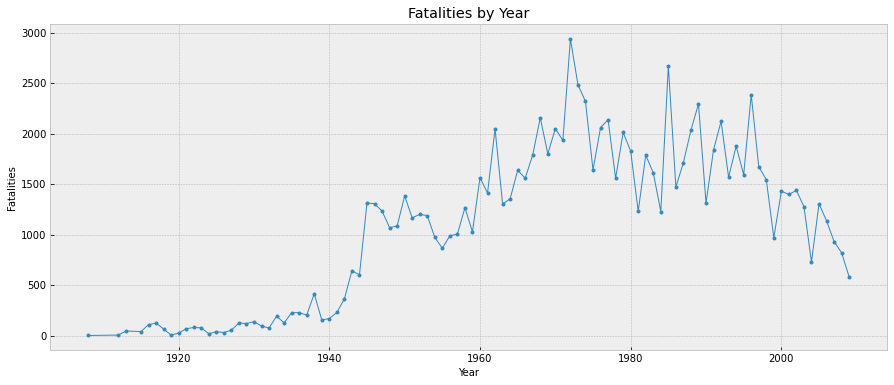

In [37]:
yearly = train[['Year','Fatalities']].groupby('Year').agg(['sum','count'])
plt.style.use('bmh')
plt.figure(figsize=(15,6))
yearly['Fatalities','sum'].plot(title='Fatalities by Year',marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Fatalities', fontsize=10)
plt.show()

#### Insights 
- 1970s and 1980s are among the worst years for airline industry. 
- 1970 is the worst so far, causing maximum number of fatal accidents.

In [46]:
train_first.head(2)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,hour,Year,Survived,Has_Survivors,date_time
0,09/17/1908,17:18,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",17,1908,1.0,1,1908-09-17 17:18:00
1,07/12/1912,06:30,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,6,1912,0.0,0,1912-07-12 06:30:00


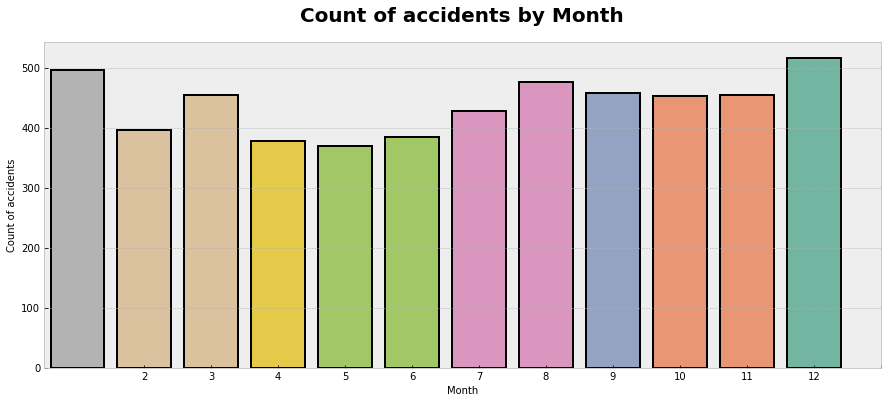

In [51]:
train_first = train.copy()
from datetime import date, timedelta, datetime
train_first['date_time'] = train['Date'] + ' ' + train['Time'] #joining two rows
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
plt.figure(figsize=(15,6))
train_first['date_time'] = train_first['date_time'].apply(todate) #convert to date type
sns.barplot(train_first.groupby(train_first.date_time.dt.month)[['Date']].count().index, 'Date', data= train_first.groupby(train_first.date_time.dt.month)[['Date']].count(),  ec = "black", palette="Set2_r", linewidth=2)
plt.xticks(train_first.groupby(train_first.date_time.dt.month)[['Date']].count().index)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count of accidents', fontsize=10)
plt.title("Count of accidents by Month", weight="bold",fontsize=20, pad=20)
plt.show()

#### Insigts
- More accidents happened during winter season ie. January and December.

Text(0.5, 1.0, 'Count of accidents by Day of Week')

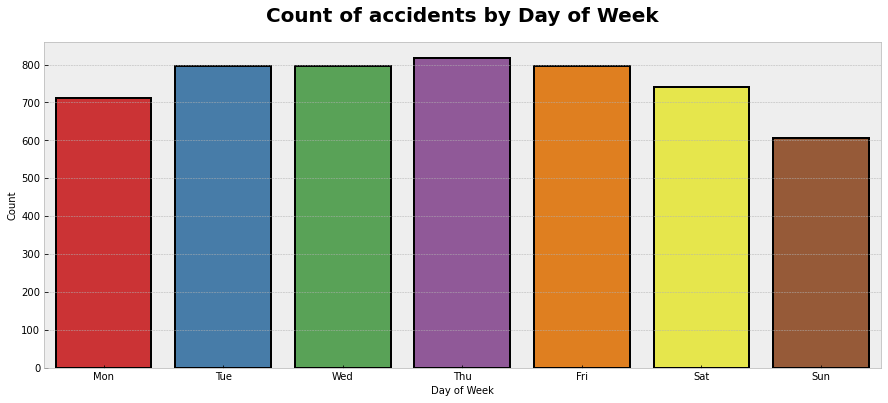

In [69]:
plt.figure(figsize=(15,6))
sns.barplot(train_first.groupby(train_first.date_time.dt.weekday)[['Date']].count().index, 'Date', data=train_first.groupby(train_first.date_time.dt.weekday)[['Date']].count(), palette="Set1", ec = "black", linewidth=2)
plt.xticks(train_first.groupby(train_first.date_time.dt.weekday)[['Date']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', weight="bold",fontsize=20, pad=20)


#### Insigts
- Most accidents happened on Thurday ie. 830 approximately.

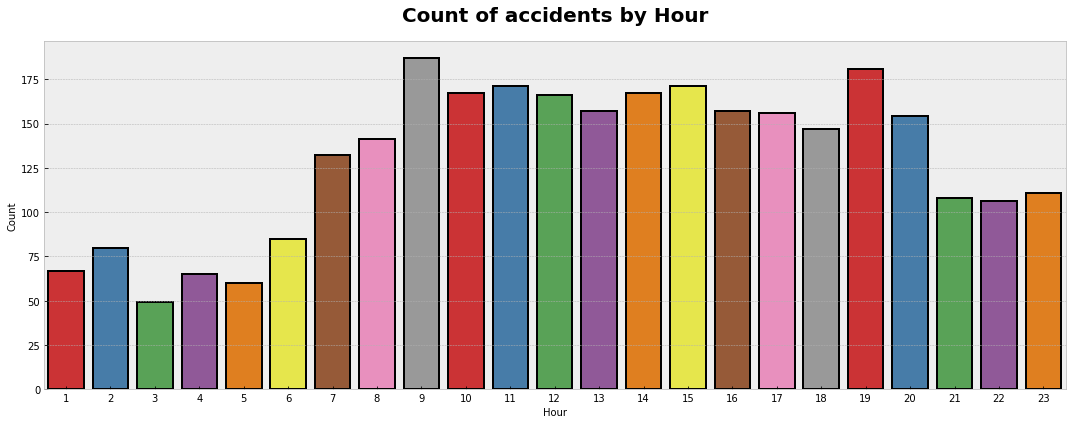

In [79]:
plt.figure(figsize=(15,6))
sns.barplot(train_first[train_first.date_time.dt.hour != 0].groupby(train_first.date_time.dt.hour)[['Date']].count().index, 'Date', data=train_first[train_first.date_time.dt.hour != 0].groupby(train_first.date_time.dt.hour)[['Date']].count(),palette="Set1", ec = "black",linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', weight="bold",fontsize=20, pad=20)
plt.tight_layout()

#### Insights
- Most accidents happened during 9 AM and 7PM

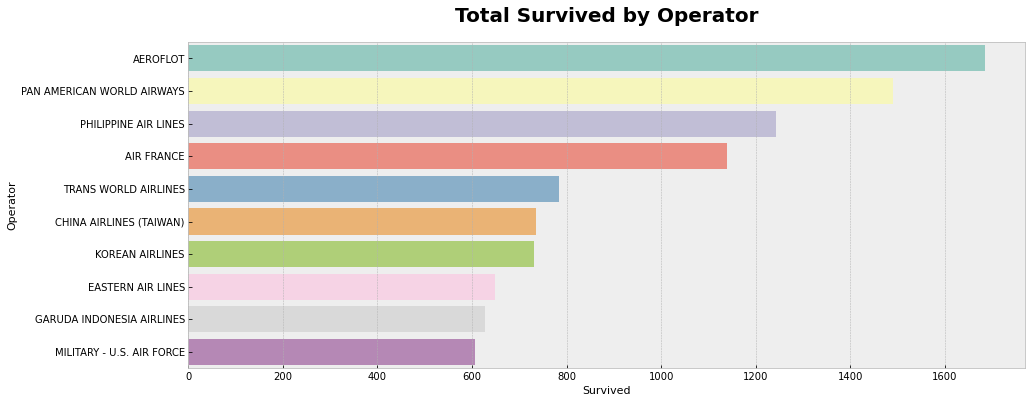

In [80]:
train1 = train.groupby('Operator')[['Survived']].sum()
train1 = train1.sort_values(by='Survived', ascending=False).head(10)
plt.figure(figsize=(15,6))
sns.barplot(y=train1.index, x="Survived", data=train1, palette="Set3", orient='h')
plt.xlabel('Survived', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Survived by Operator', weight="bold",fontsize=20, pad=20)
plt.show()

#### Insights
- AEROFLOT Operator has saved 1686 accidents.

In [91]:
from collections import Counter
loc_list = Counter(train['Location'].dropna()).most_common(10)
locs = []
crashes = []
for loc in loc_list:
    locs.append(loc[0])
    crashes.append(loc[1])
crashes_location = pd.DataFrame({'Crashes in this location' : crashes}, index=locs)

Text(0.5, 1.0, 'Crashes vs location')

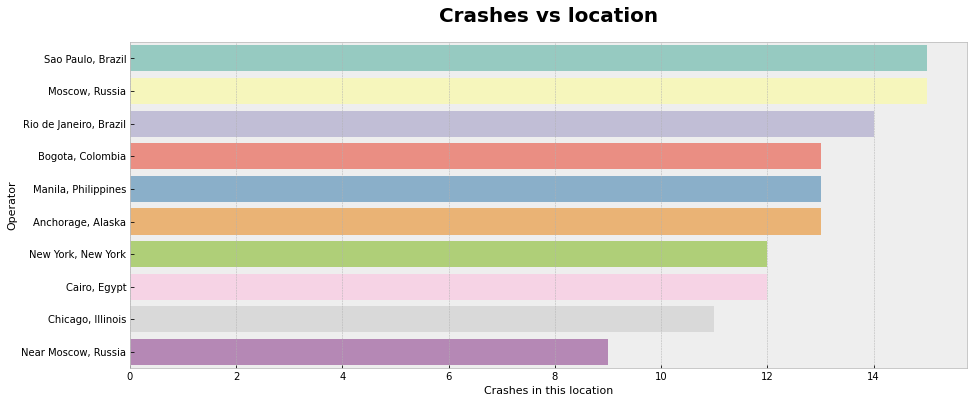

In [94]:
plt.figure(figsize=(15,6))
sns.barplot(x="Crashes in this location",y=crashes_location.index, data=crashes_location, palette="Set3")
plt.xlabel('Crashes in this location', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Crashes vs location', weight="bold",fontsize=20, pad=20)

#### Insights 
- As we can observe Sao Paulo, Brazil is the most dangerous location where itself 16 accidents occured.